# Assignment2 - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [ ]:
# מטלה 2 - למידה מונחית - Flow
# Dataset: Titanic

In [ ]:
# Student: Yossi Yadgar
# ID: 207687898

In [ ]:
# Student: Omer Turgeman
# ID: 322604851

In [ ]:
# בעיה זו עוסקת בסיווג - האם נוסע שרד את אסון הטיטאניק או לא 
# מטרתנו להשתמש במאפייני הנושאים בכדי לחזות אם שרד

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

In [33]:
#AI agent name:ChatGPT
#Goal:קבלה של כל המחלקות שנצטרך להשתמש בהן בעבודה
#Propmpt1: יש לנו עבודה שבה נצטרך לבצע תהליך מלא של למידת מכונה על דאטהסט קיים, האם תוכל לתת לי את כל המחלקות שנצטרך במהלך העבודה
    

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:AI agent name:ChatGPT
Goal:קבלה של כל המחלקות שנצטרך להשתמש בהן בעבודה
Propmpt1: יש לנו עבודה שבה נצטרך לבצע תהליך מלא של למידת מכונה על דאטהסט קיים, האם תוכל לתת לי את כל המחלקות שנצטרך במהלך העבודה
    

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>


בפרויקט זה נעשה שימוש בדאטהסט המבוסס על נתוני הנוסעים בטיטאניק (טיטאניק), שנועד לנתח ולחזות אילו נוסעים שרדו את האסון. הדאטהסט מכיל נתונים נומריים בלבד, עם שדות שונים המתארים מאפיינים אישיים של כל נוסע

המטרה היא לבנות מודל סיווג שיחזה האם נוסע שרד את האסון (1) או לא (0) – על בסיס המאפיינים

במהלך העבודה השתמשנו בטכניקות שונות של פיצ'ר אנג'ינירינג, ניתוח נתונים וחיפוש פרמטרים כדי לשפר את ביצועי המודל. הדגש היה על שימוש במדדים כמו דיוק ו-אף 1 כדי להעריך את ביצועי המודלים, ולבחור את המודל המתאים ביותר לסיווג הנוסעים.




    
</pre>

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [34]:
# כלים כלליים
import pandas as pd
import numpy as np

# הדמיה
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

# עיבוד נתונים ו-Feature Engineering
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif

# חלוקת נתונים ודירוג מודלים
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate

# אלגוריתמים של סיווג
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# מדדי ביצועים
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    accuracy_score,
    precision_score,
    recall_score,
    make_scorer
)


In [2]:
train = pd.read_csv("titanic_train.csv")
test = pd.read_csv("titanic_test.csv")

train.head()
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,35.000000,0,0,7.0500,0,0
1,3,1,30.000000,0,0,7.2500,0,0
2,3,1,29.699118,0,0,14.5000,0,0
3,3,0,21.000000,0,0,7.7500,2,0
4,3,1,32.000000,0,0,56.4958,0,1


In [3]:
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    int64  
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    int64  
 7   Survived  712 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 44.6 KB


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,2.294944,0.640449,29.531213,0.528090,0.384831,32.379429,0.372191,0.394663
std,0.841990,0.480206,13.188028,1.055052,0.803085,49.836074,0.649970,0.489122
min,1.000000,0.000000,0.670000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.750000,0.000000,22.000000,0.000000,0.000000,7.925000,0.000000,0.000000
50%,3.000000,1.000000,29.699118,0.000000,0.000000,14.500000,0.000000,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,1.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000,1.000000


In [4]:
fig = px.histogram(train, x='Survived', color='Survived',
                   title='Survival Count (Interactive)',
                   color_discrete_map={0: 'darkred', 1: 'darkgreen'})
fig.show()

In [5]:
fig = px.histogram(train, x='Age', nbins=30, title='Age Distribution')
fig.show()

In [6]:
fig = px.histogram(train, x='Sex', color='Survived',
                   title='Survival by Gender',
                   barmode='group')
fig.show()


In [7]:
fig = px.histogram(train, x='Age', color='Survived',
                   nbins=30, barmode='overlay',
                   title='Age Distribution by Survival',
                   opacity=0.6)
fig.show()


## Part 3 - Experiments
You could add as many code cells as needed

In [36]:
# יצירת מאפיין חדש: קבוצות גיל
train['age_group'] = pd.cut(train['Age'], bins=[0, 14, 60, 120], labels=[0, 1, 2]).astype(int)
test['age_group'] = pd.cut(test['Age'], bins=[0, 14, 60, 120], labels=[0, 1, 2]).astype(int)

# יצירת מאפיין: גודל המשפחה (כולל הנוסע עצמו)
train['family_size'] = train['SibSp'] + train['Parch'] + 1
test['family_size'] = test['SibSp'] + test['Parch'] + 1

# יצירת מאפיין בינארי: האם נוסע לבד
train['is_alone'] = ((train['SibSp'] == 0) & (train['Parch'] == 0)).astype(int)
test['is_alone'] = ((test['SibSp'] == 0) & (test['Parch'] == 0)).astype(int)

# יצירת מאפיין בינארי: האם הנוסע הוא ילד
train['is_child'] = (train['Age'] < 14).astype(int)
test['is_child'] = (test['Age'] < 14).astype(int)


In [37]:
# הפרדת משתנה המטרה (Survived) מהמאפיינים (features)

# סט אימון
X_train = train.drop('Survived', axis=1)  # כל העמודות פרט ל־Survived
y_train = train['Survived']               # רק העמודה Survived

# סט בדיקה
X_test = test.drop('Survived', axis=1)
y_test = test['Survived']
if 'Survived' in test.columns:
    X_test = test.drop('Survived', axis=1)
    y_test = test['Survived']
else:
    X_test = test.copy()
    y_test = None  # או השאר ריק לעת עתה



In [10]:
def prepare_data(features_to_include):
    columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'] + features_to_include
    return train[columns].copy(), test[columns].copy()

# הפיצ'רים שייבחנו
feature_sets = {
    "Baseline": [],
    "Is Child only": ['is_child'],
    "Age Group": ['age_group'],
    "Family Size only": ['family_size'],
    "Age Group + Is Child": ['age_group', 'is_child'],
    "Age Group + Family Size": ['age_group', 'family_size'],
    "Is Child + Family Size": ['is_child', 'family_size'],
    "All": ['is_child', 'family_size', 'age_group']
}

# שמירת התוצאות
results = []

# לולאה על כל סט אפשרי
for name, extra_features in feature_sets.items():
    print(f"\n=== Testing Feature Set: {name} ===")
    
    base_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
    columns = base_cols + extra_features
    
    X_train_sub = train[columns].copy()
    X_test_sub = test[columns].copy()


    # Scaling + סינון פיצ'רים עם סטיית תקן אפס
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_sub)
    X_test_scaled = scaler.transform(X_test_sub)

    selector = VarianceThreshold(threshold=0.0)
    X_train_scaled = selector.fit_transform(X_train_scaled)
    X_test_scaled = selector.transform(X_test_scaled)

    # אימון המודל
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}")
    
    results.append({
        'Feature Set': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    })

# טבלה מסכמת
results_df = pd.DataFrame(results)
print("\n=== Summary Table ===")

display(results_df.sort_values('F1 Score', ascending=False))


=== Testing Feature Set: Baseline ===
Accuracy: 0.8492, Precision: 0.7656, Recall: 0.8033, F1: 0.7840

=== Testing Feature Set: Is Child only ===
Accuracy: 0.8492, Precision: 0.7742, Recall: 0.7869, F1: 0.7805

=== Testing Feature Set: Age Group ===
Accuracy: 0.8715, Precision: 0.8065, Recall: 0.8197, F1: 0.8130

=== Testing Feature Set: Family Size only ===
Accuracy: 0.8492, Precision: 0.7656, Recall: 0.8033, F1: 0.7840

=== Testing Feature Set: Age Group + Is Child ===
Accuracy: 0.8603, Precision: 0.8103, Recall: 0.7705, F1: 0.7899

=== Testing Feature Set: Age Group + Family Size ===
Accuracy: 0.8547, Precision: 0.7869, Recall: 0.7869, F1: 0.7869

=== Testing Feature Set: Is Child + Family Size ===
Accuracy: 0.8436, Precision: 0.7538, Recall: 0.8033, F1: 0.7778

=== Testing Feature Set: All ===
Accuracy: 0.8547, Precision: 0.7869, Recall: 0.7869, F1: 0.7869

=== Summary Table ===


,Feature Set,Accuracy,Precision,Recall,F1 Score
2,Age Group,0.871508,0.806452,0.819672,0.813008
4,Age Group + Is Child,0.860335,0.810345,0.770492,0.789916
5,Age Group + Family Size,0.854749,0.786885,0.786885,0.786885
7,All,0.854749,0.786885,0.786885,0.786885
0,Baseline,0.849162,0.765625,0.803279,0.784000
3,Family Size only,0.849162,0.765625,0.803279,0.784000
1,Is Child only,0.849162,0.774194,0.786885,0.780488
6,Is Child + Family Size,0.843575,0.753846,0.803279,0.777778


In [11]:
### הורדה של פיצרים שרק גורעים לנו מהתוצאות
X_train.drop(columns=['is_child', 'family_size'], inplace=True, errors='ignore')
X_test.drop(columns=['is_child', 'family_size'], inplace=True, errors='ignore')



In [12]:
dt_model = DecisionTreeClassifier(random_state=42)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)

# KNN (K-Nearest Neighbors)
knn_model = KNeighborsClassifier(n_neighbors=5)

# רשימה של המודלים כדי לעבור עליהם בלולאה
models = {
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "K-Nearest Neighbors": knn_model
}


In [13]:
def evaluate_and_display_model(model_name, model, X_train, y_train, X_test, y_test):

    print(f"\n--- Training and prediction for: {model_name} ---")

    # אימון המודל
    model.fit(X_train, y_train)

    # ביצוע תחזיות
    y_pred = model.predict(X_test)

    # הדפסת מדדי הערכה
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")

    # הצגת Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Did not survive (predicted)', 'Survived (predicted)'],
                yticklabels=['Did not survive (real)', 'Survived (real)'])
    plt.xlabel('Model Prediction', fontsize=12)
    plt.ylabel('Real Value', fontsize=12)
    plt.title(f'Confusion Matrix for: {model_name}', fontsize=14)
    plt.show()


--- Training and prediction for: Decision Tree ---
Accuracy: 0.8268
Precision: 0.7143
Recall: 0.8197
F1-Score: 0.7634


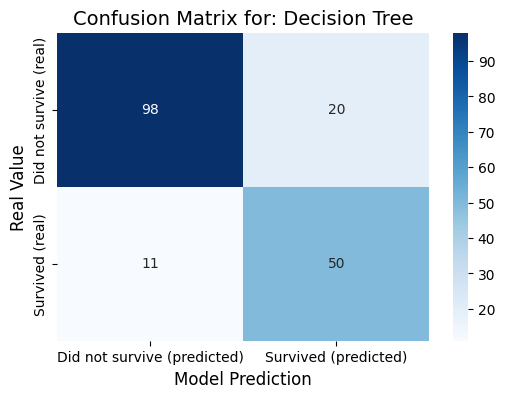


--- Training and prediction for: Random Forest ---
Accuracy: 0.8547
Precision: 0.7869
Recall: 0.7869
F1-Score: 0.7869


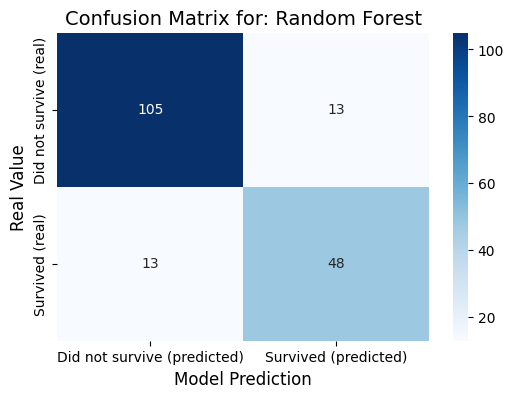


--- Training and prediction for: K-Nearest Neighbors ---
Accuracy: 0.8380
Precision: 0.7581
Recall: 0.7705
F1-Score: 0.7642


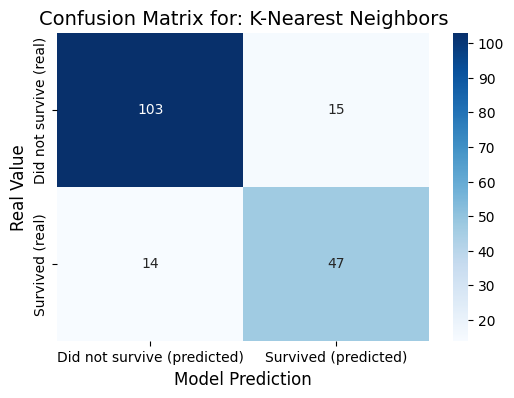

In [14]:

# הרצת הפונקציה עבור כל אחד מהמודלים שבחרתם
for name, model in models.items():
    evaluate_and_display_model(name, model, X_train_scaled, y_train, X_test_scaled, y_test)

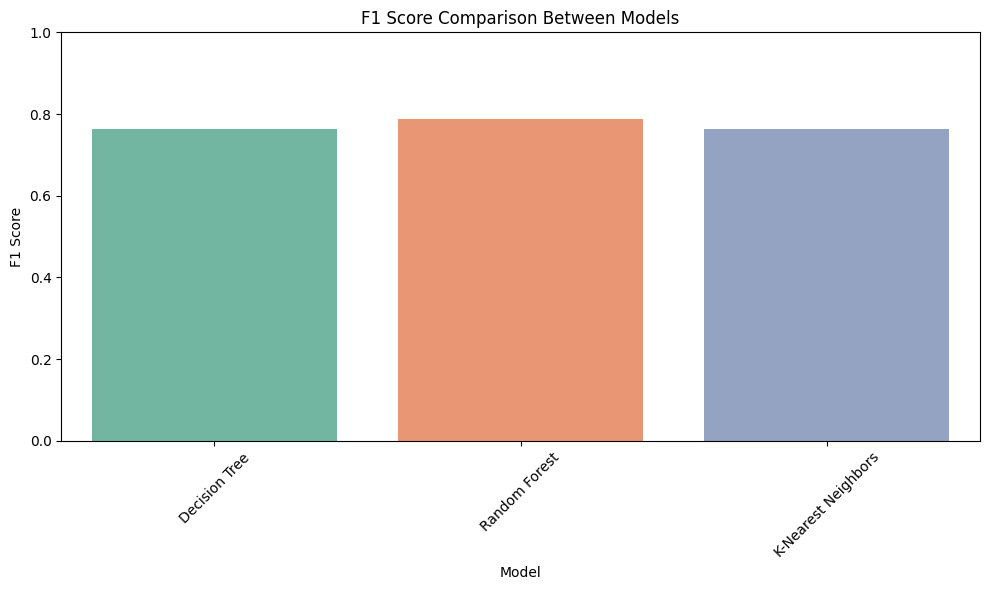

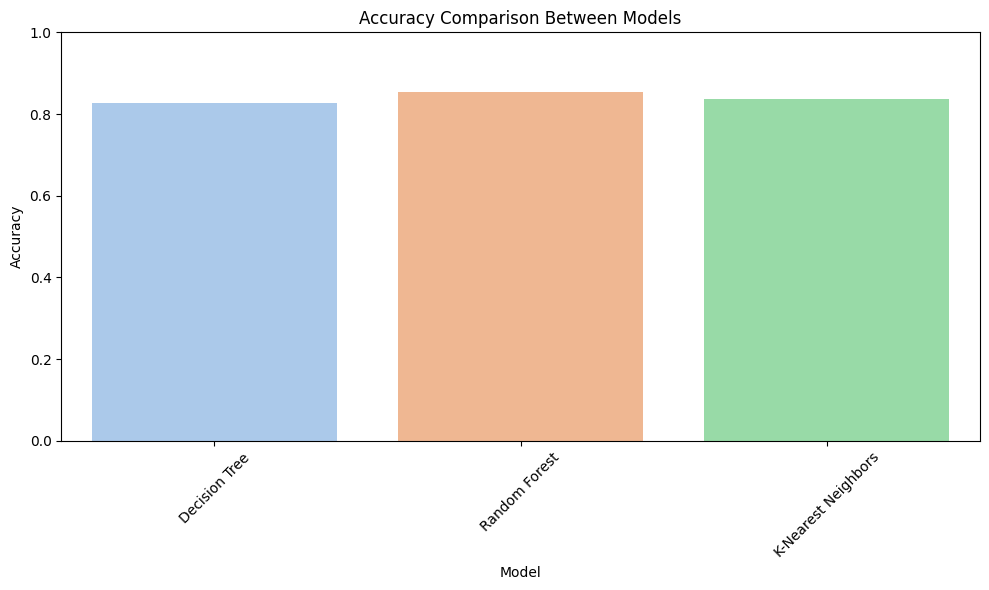

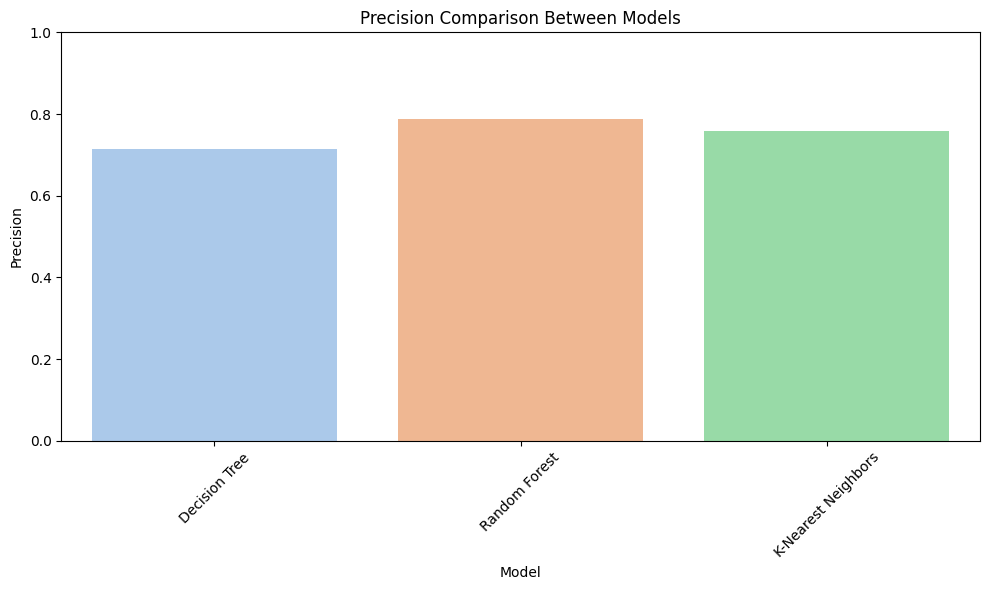

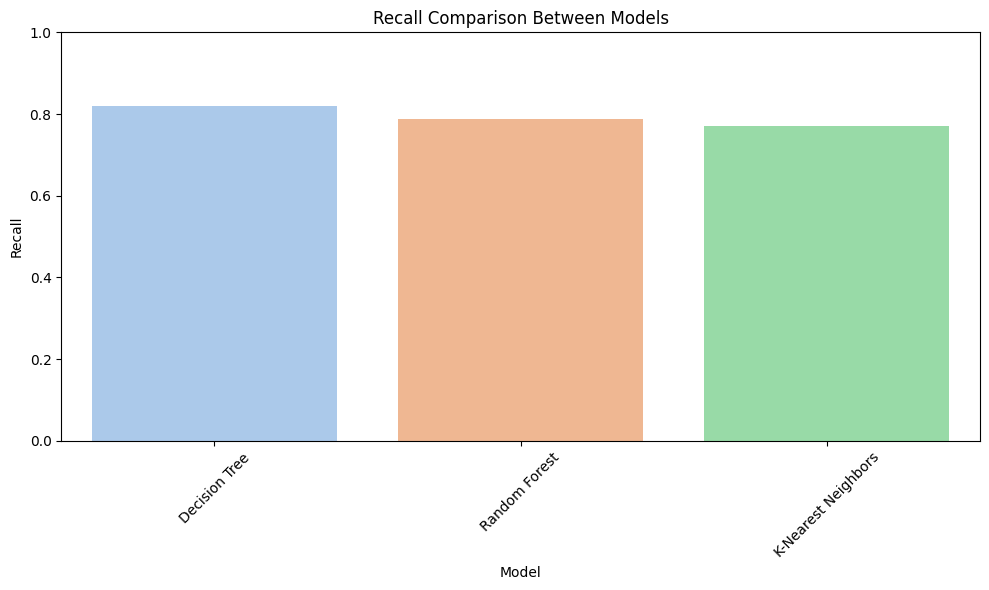

In [15]:
# 🧪 יצירת רשימה חדשה לאיסוף התוצאות
results_summary = []

# הפעל מחדש את המודלים ואסוף תוצאות להמחשה
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    results_summary.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, zero_division=0),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred)
    })

# הפוך ל-DataFrame
results_df = pd.DataFrame(results_summary)

# 🎨 גרף השוואה לפי F1
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='F1', palette='Set2', hue = 'Model', legend = False)
plt.title("F1 Score Comparison Between Models")
plt.ylabel("F1 Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 🎨 גרפים נוספים להשוואה
for metric in ['Accuracy', 'Precision', 'Recall']:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=results_df, x='Model', y=metric, palette='pastel', hue = 'Model', legend = False)
    plt.title(f"{metric} Comparison Between Models")
    plt.ylabel(metric)
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [38]:
# הגדרת התכונות לבחירה
selected_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'age_group']

# חלוקה למאפיינים ולתוויות
X_train = train[selected_features].copy()
X_test = test[selected_features].copy()
y_train = train['Survived']
y_test = test['Survived']

# פונקציה לבחירת תכונות והרצת GridSearchCV עבור ערך k נתון
def run_feature_selection_gridsearch(k):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('select', SelectKBest(score_func=f_classif, k=k)),
        ('model', RandomForestClassifier(random_state=42))
    ])

    param_grid = {
        'model__n_estimators': [100],
        'model__max_depth': [5, 10, None],
        'model__min_samples_split': [2],
    }

    grid = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        scoring='f1',
        cv=5,
        n_jobs=-1,
        verbose=0
    )

    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    selected_mask = best_model.named_steps['select'].get_support()
    selected_feature_names = [f for f, keep in zip(selected_features, selected_mask) if keep]

    return {
        'k': k,
        'F1 Score': f1_score(y_test, y_pred),
        'Accuracy': accuracy_score(y_test, y_pred),
        'Selected Features': selected_feature_names,
        'Best Params': grid.best_params_
    }


Running for k = 1


Running for k = 2
Running for k = 3
Running for k = 4
Running for k = 5
Running for k = 6
Running for k = 7
Running for k = 8

=== Feature Selection Results by K ===


,k,F1 Score,Accuracy,Selected Features,Best Params
7,8,0.827586,0.888268,"[Pclass, Sex, Age, SibSp, Parch, Fare, Embarke...","{'model__max_depth': 10, 'model__min_samples_s..."
6,7,0.803419,0.871508,"[Pclass, Sex, Age, Parch, Fare, Embarked, age_...","{'model__max_depth': 10, 'model__min_samples_s..."
5,6,0.781818,0.865922,"[Pclass, Sex, Parch, Fare, Embarked, age_group]","{'model__max_depth': 10, 'model__min_samples_s..."
3,4,0.771930,0.854749,"[Pclass, Sex, Fare, age_group]","{'model__max_depth': None, 'model__min_samples..."
2,3,0.767857,0.854749,"[Pclass, Sex, Fare]","{'model__max_depth': None, 'model__min_samples..."
4,5,0.766355,0.860335,"[Pclass, Sex, Fare, Embarked, age_group]","{'model__max_depth': 10, 'model__min_samples_s..."
0,1,0.672269,0.782123,[Sex],"{'model__max_depth': 5, 'model__min_samples_sp..."
1,2,0.672269,0.782123,"[Pclass, Sex]","{'model__max_depth': 5, 'model__min_samples_sp..."


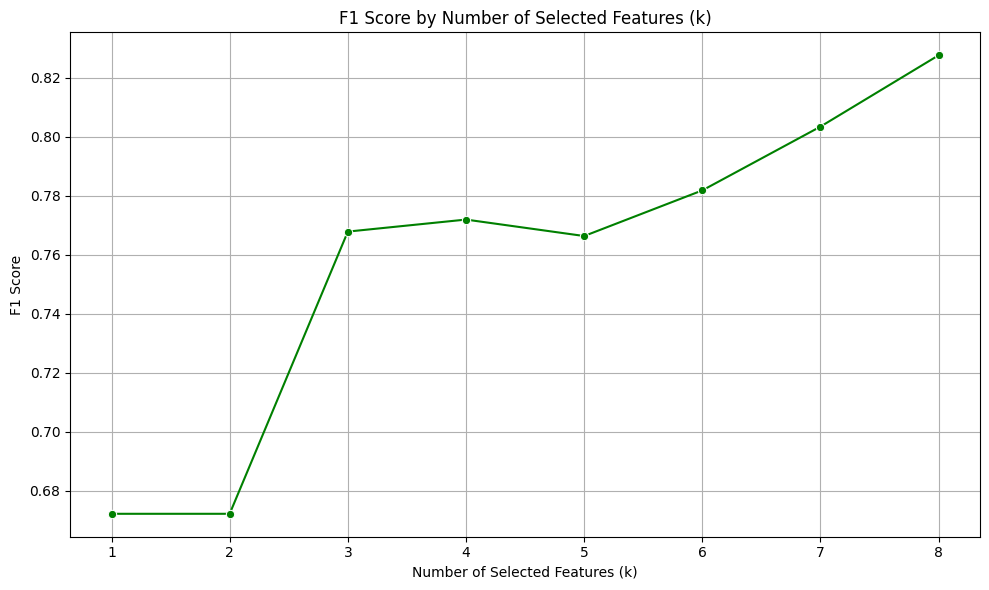

In [39]:
# הרצה בלולאה על ערכי k שונים לצורך בחירת מספר התכונות האופטימלי
results = []

for k in range(1, len(selected_features) + 1):
    print(f"Running for k = {k}")
    result = run_feature_selection_gridsearch(k)
    results.append(result)

# הפיכת התוצאות לטבלה
results_df = pd.DataFrame(results)

# הצגת הטבלה ממוינת לפי F1 Score
print("\n=== Feature Selection Results by K ===")
display(results_df.sort_values("F1 Score", ascending=False))

# גרף: ביצועי F1 Score לפי מספר התכונות שנבחרו
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, x='k', y='F1 Score', marker='o', color='green')
plt.title("F1 Score by Number of Selected Features (k)")
plt.xlabel("Number of Selected Features (k)")
plt.ylabel("F1 Score")
plt.xticks(results_df['k'])
plt.grid(True)
plt.tight_layout()
plt.show()


In [18]:
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(random_state=42))
])

param_grid_rf = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [5, 10, 20, None],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['sqrt', 'log2']
}

grid_rf = GridSearchCV(
    estimator=pipeline_rf,
    param_grid=param_grid_rf,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# 🚀 התאמת הרשת על הנתוני אימון
grid_rf.fit(X_train, y_train)

print("Best Parameters (RF):", grid_rf.best_params_)
best_RF_model = grid_rf.best_estimator_



Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters (RF): {'model__max_depth': 10, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 100}


In [40]:
# חיזוי עם המודל הטוב ביותר של Random Forest
y_pred_rf = best_RF_model.predict(X_test)

# דוחות ביצועים
print("Classification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))
print("Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))
print("F1 Score (Random Forest):", f1_score(y_test, y_pred_rf))


Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.90      0.95      0.92       118
           1       0.89      0.79      0.83        61

    accuracy                           0.89       179
   macro avg       0.89      0.87      0.88       179
weighted avg       0.89      0.89      0.89       179

Accuracy (Random Forest): 0.8938547486033519
F1 Score (Random Forest): 0.8347826086956521


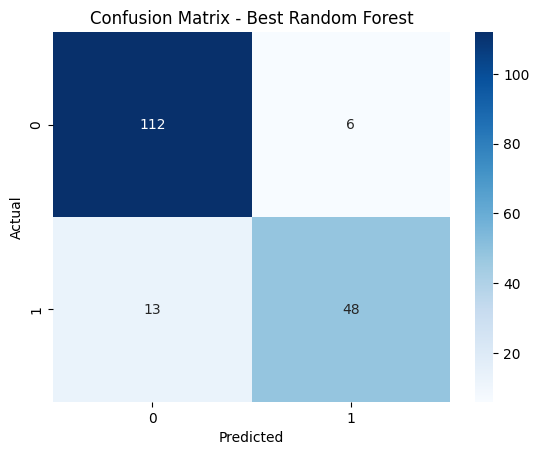

In [20]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Best Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

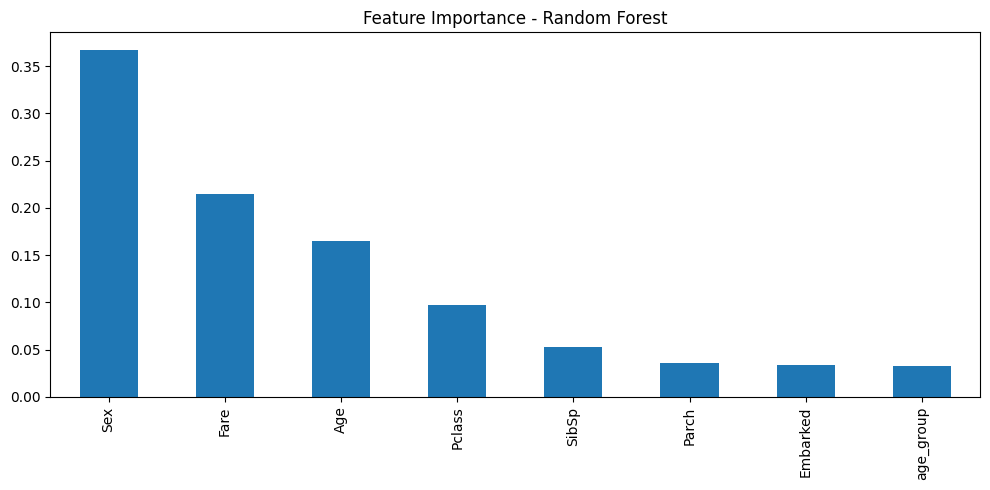

In [21]:
feature_importances = best_RF_model.named_steps['model'].feature_importances_
importances_series = pd.Series(feature_importances, index=X_train.columns)
importances_series.sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.title("Feature Importance - Random Forest")
plt.tight_layout()
plt.show()

In [22]:
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier())
])

param_grid_knn = {
    'model__n_neighbors': [3, 5, 7],
    'model__weights': ['uniform'],
    'model__metric': ['euclidean', 'manhattan']
}

f1_scorer = make_scorer(f1_score, pos_label=1)

grid_knn = GridSearchCV(
    estimator=pipeline_knn,
    param_grid=param_grid_knn,
    scoring=f1_scorer,
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_knn.fit(X_train, y_train)

print("Best Parameters (KNN):", grid_knn.best_params_)
print("Best CV F1 Score (KNN):", grid_knn.best_score_)

best_knn_model = grid_knn.best_estimator_
y_pred_knn = best_knn_model.predict(X_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters (KNN): {'model__metric': 'euclidean', 'model__n_neighbors': 3, 'model__weights': 'uniform'}
Best CV F1 Score (KNN): 0.7420471825672963


In [23]:

print("\nTest Set Performance (KNN):")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn, zero_division=0))
print("Recall:", recall_score(y_test, y_pred_knn))
print("F1 Score:", f1_score(y_test, y_pred_knn))


Test Set Performance (KNN):
Accuracy: 0.8435754189944135
Precision: 0.7619047619047619
Recall: 0.7868852459016393
F1 Score: 0.7741935483870968


In [41]:
# דוחות ביצועים עבור מודל KNN
print("Classification Report (KNN):\n", classification_report(y_test, y_pred_knn))
print("Accuracy (KNN):", accuracy_score(y_test, y_pred_knn))
print("F1 Score (KNN):", f1_score(y_test, y_pred_knn))


Classification Report (KNN):
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       118
           1       0.76      0.79      0.77        61

    accuracy                           0.84       179
   macro avg       0.82      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179

Accuracy (KNN): 0.8435754189944135
F1 Score (KNN): 0.7741935483870968


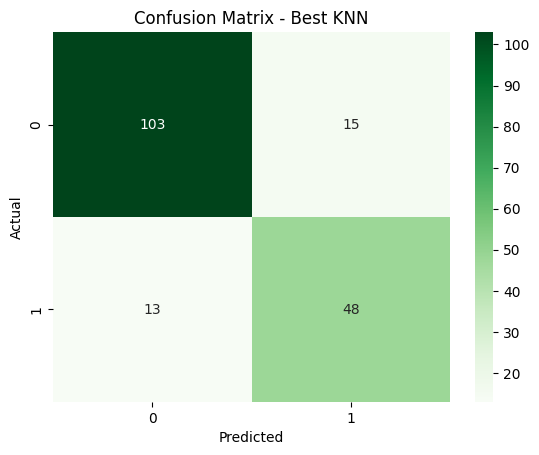

In [25]:
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Best KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

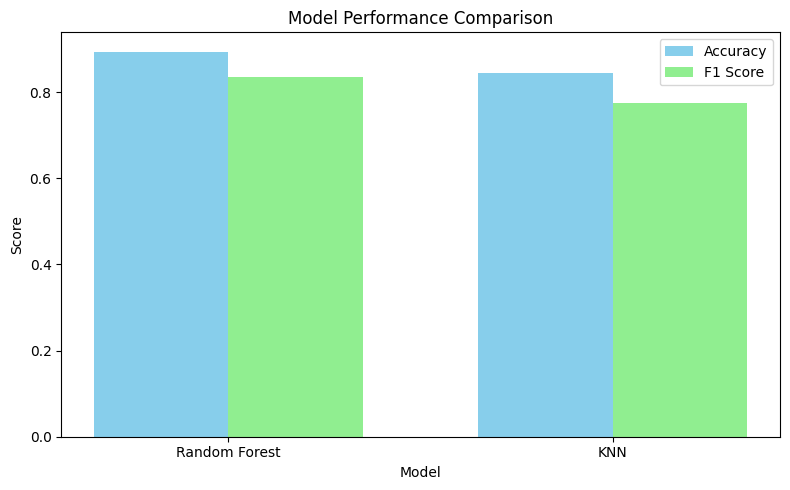

In [26]:
metrics = {
    'Model': ['Random Forest', 'KNN'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_knn)
    ],
    'F1 Score': [
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_knn)
    ]
}
df_metrics = pd.DataFrame(metrics)

fig, ax = plt.subplots(figsize=(8,5))
bar_width = 0.35
index = np.arange(len(df_metrics))

ax.bar(index, df_metrics['Accuracy'], bar_width, label='Accuracy', color='skyblue')
ax.bar(index + bar_width, df_metrics['F1 Score'], bar_width, label='F1 Score', color='lightgreen')

ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(df_metrics['Model'])
ax.legend()

plt.tight_layout()
plt.show()


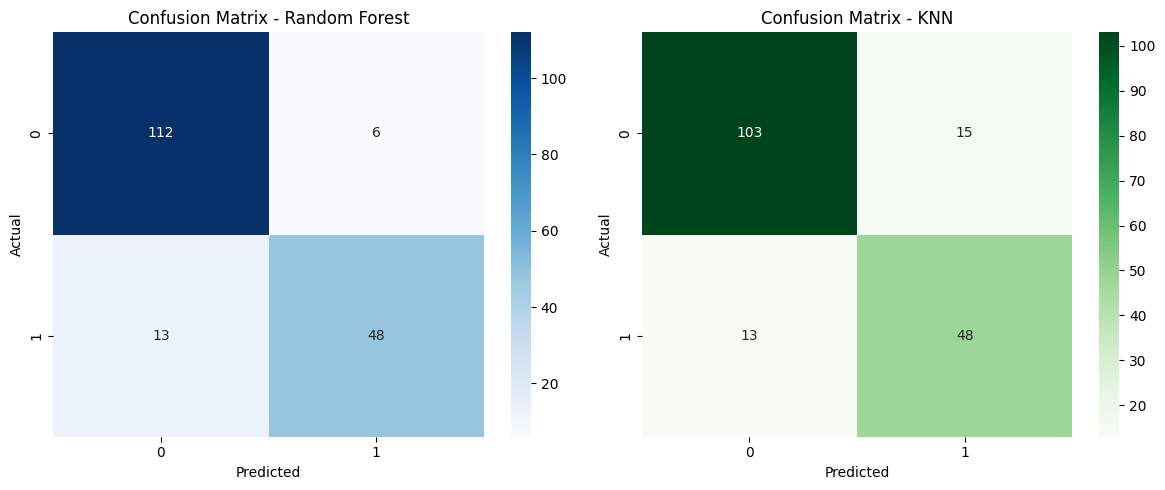

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix - Random Forest')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Confusion Matrix - KNN')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [42]:
# חישוב המדדים לשני המודלים
rf_f1 = f1_score(y_test, y_pred_rf)
rf_acc = accuracy_score(y_test, y_pred_rf)

knn_f1 = f1_score(y_test, y_pred_knn)
knn_acc = accuracy_score(y_test, y_pred_knn)

# הדפסת טבלת השוואה של שני המודלים
print("=== Model Comparison ===")
print(f"Random Forest -> Accuracy: {rf_acc:.4f} | F1 Score: {rf_f1:.4f}")
print(f"KNN           -> Accuracy: {knn_acc:.4f} | F1 Score: {knn_f1:.4f}")


=== Model Comparison ===
Random Forest -> Accuracy: 0.8939 | F1 Score: 0.8348
KNN           -> Accuracy: 0.8436 | F1 Score: 0.7742


In [43]:
# בחירת מודל לפי F1 Score
if rf_f1 >= knn_f1:
    best_model_f1 = best_RF_model
    best_model_name_f1 = 'Random Forest'
    best_metric_f1 = rf_f1
else:
    best_model_f1 = best_knn_model
    best_model_name_f1 = 'KNN'
    best_metric_f1 = knn_f1

# בחירת מודל לפי Accuracy
if rf_acc >= knn_acc:
    best_model_acc = best_RF_model
    best_model_name_acc = 'Random Forest'
    best_metric_acc = rf_acc
else:
    best_model_acc = best_knn_model
    best_model_name_acc = 'KNN'
    best_metric_acc = knn_acc

# הצגת תוצאות ההשוואה
if best_model_name_f1 == best_model_name_acc:
    print(f"\nBest Model: {best_model_name_f1} selected by both F1 Score ({best_metric_f1:.4f}) and Accuracy ({best_metric_acc:.4f})")
    final_model = best_model_f1
else:
    print(f"\nBest Model by F1 Score: {best_model_name_f1} (F1 Score: {best_metric_f1:.4f})")
    print(f"Best Model by Accuracy: {best_model_name_acc} (Accuracy: {best_metric_acc:.4f})")

# בחירת המודל הסופי לפי F1 Score (ניתן לשנות לפי צורך)
final_model = best_model_f1

# חיזוי על כל סט הבדיקה
y_pred_all = final_model.predict(X_test)



Best Model: Random Forest selected by both F1 Score (0.8348) and Accuracy (0.8939)


In [44]:
# דוח ביצועים מלא עבור המודל הסופי
print(f"\n=== Classification Report ({best_model_name_f1}) ===")
print(classification_report(y_test, y_pred_all))
print(f"Accuracy: {accuracy_score(y_test, y_pred_all):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_all):.4f}")



=== Classification Report (Random Forest) ===
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       118
           1       0.89      0.79      0.83        61

    accuracy                           0.89       179
   macro avg       0.89      0.87      0.88       179
weighted avg       0.89      0.89      0.89       179

Accuracy: 0.8939
F1 Score: 0.8348


## Part 5 - Apply on test and show model performance estimation


=== First 100 Predictions ===
Passenger 0 | Predicted: 0 | Actual: 0
Passenger 1 | Predicted: 0 | Actual: 0
Passenger 2 | Predicted: 0 | Actual: 0
Passenger 3 | Predicted: 1 | Actual: 0
Passenger 4 | Predicted: 1 | Actual: 1
Passenger 5 | Predicted: 0 | Actual: 1
Passenger 6 | Predicted: 0 | Actual: 0
Passenger 7 | Predicted: 0 | Actual: 0
Passenger 8 | Predicted: 1 | Actual: 1
Passenger 9 | Predicted: 0 | Actual: 0
Passenger 10 | Predicted: 1 | Actual: 1
Passenger 11 | Predicted: 0 | Actual: 0
Passenger 12 | Predicted: 0 | Actual: 0
Passenger 13 | Predicted: 0 | Actual: 0
Passenger 14 | Predicted: 0 | Actual: 0
Passenger 15 | Predicted: 0 | Actual: 0
Passenger 16 | Predicted: 0 | Actual: 0
Passenger 17 | Predicted: 1 | Actual: 1
Passenger 18 | Predicted: 1 | Actual: 1
Passenger 19 | Predicted: 0 | Actual: 0
Passenger 20 | Predicted: 0 | Actual: 1
Passenger 21 | Predicted: 0 | Actual: 0
Passenger 22 | Predicted: 1 | Actual: 1
Passenger 23 | Predicted: 0 | Actual: 0
Passenger 24 | Pred

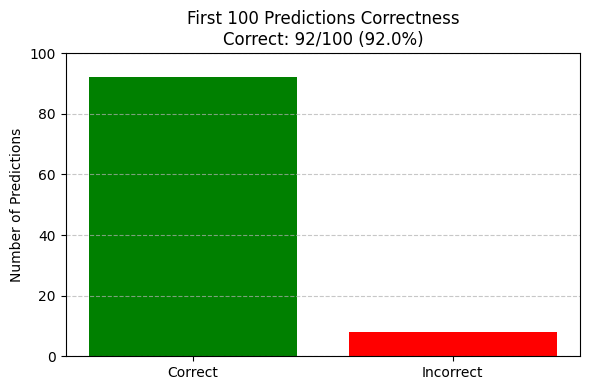

In [45]:
# הצגת התחזיות הראשונות והשוואה לערכים האמיתיים
print("\n=== First 100 Predictions ===")
first_100_predictions = y_pred_all[:100]
first_100_actual = y_test.iloc[:100].values

correct_predictions = 0
for i in range(len(first_100_predictions)):
    passenger_id = X_test.index[i]
    predicted = first_100_predictions[i]
    actual = first_100_actual[i]
    if predicted == actual:
        correct_predictions += 1
    print(f"Passenger {passenger_id} | Predicted: {predicted} | Actual: {actual}")

print(f"\nCorrect Predictions out of first 100: {correct_predictions}/100")

# הצגת גרף סיכום
correct_percent = (correct_predictions / 100) * 100

plt.figure(figsize=(6, 4))
plt.bar(['Correct', 'Incorrect'], [correct_predictions, 100 - correct_predictions], color=['green', 'red'])
plt.ylim(0, 100)
plt.ylabel('Number of Predictions')
plt.title(f'First 100 Predictions Correctness\nCorrect: {correct_predictions}/100 ({correct_percent:.1f}%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
